**About data**<br> We have mushroom dataset, which has 8124 rows and 23 columns.dataset has two kind of mushroom's species, one is poisoness and other can be eaten.Entire dataset has cateogrical features. All features have 2+ category except one columns.



In [1]:
# we will be using some important python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

# we will install some more library while modeling

In [2]:
# loading data 
mushroom_ds = pd.read_csv("mushrooms.csv")
mushroom_ds.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1304,e,f,s,g,f,n,f,w,b,k,...,f,w,w,p,w,o,e,n,a,g
4521,p,x,f,y,f,f,f,c,b,g,...,k,p,b,p,w,o,l,h,v,d
1509,e,x,f,n,t,n,f,c,b,p,...,s,w,p,p,w,o,p,k,y,d
6560,p,k,s,n,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
7351,p,k,s,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l


In [3]:
mushroom_ds.shape # shape function gives the rows and columns

(8124, 23)

In [4]:
# describe function to check the stats
mushroom_ds.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


all the features have 2+ unique values except veil-type columns

In [5]:
mushroom_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

1.There is no missing value in the dataset.<br>2.All the columns are object type 

In [6]:
# changing the datatype of the columns to categorical as columns have lot of repetative values

mushroom_ds = mushroom_ds.astype("category")

e    4208
p    3916
Name: class, dtype: int64


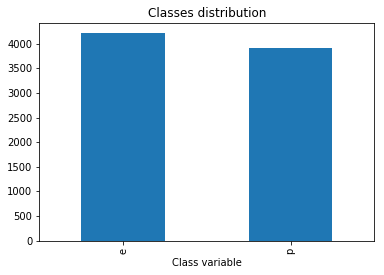

In [7]:
# checking the class values
print(mushroom_ds["class"].value_counts())
mushroom_ds["class"].value_counts().plot(kind = "bar")
plt.title("Classes distribution")
plt.xlabel("Class variable");

In [8]:
# performing labelencoding 
le = LabelEncoder()
for i in mushroom_ds.columns:
    le.fit(mushroom_ds[i])
    mushroom_ds[i] = le.transform(mushroom_ds[i])
mushroom_ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


post conversion class e(edible) value changed into 0 and p(poison) into 1

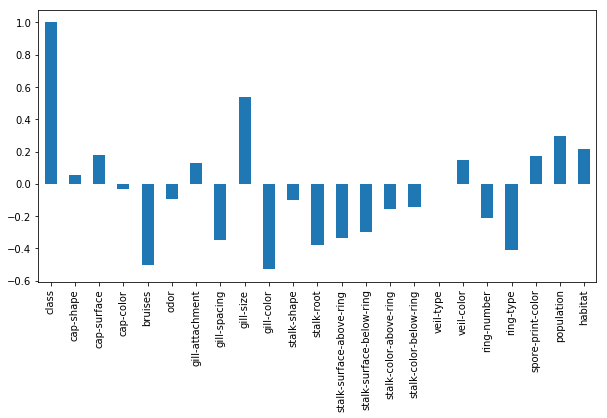

In [9]:
# checking the correlation
plt.figure(figsize = (10,5))
mushroom_ds.corr().iloc[:,0].plot(kind = "bar"); # plotting the class VS other colums correlation

1. columns like cap shape and surface, gill-size, vail-color,spore-print-color,popolation habitat are positive correlated<br>2. Rest are all negative correlated<br>3.vail-type has only one value and post conversion all value are like NAN/0 thus we will delete it 

In [10]:
mushroom_ds.drop("veil-type",axis = 1, inplace = True) # deleting the veil-type column

In [11]:
# Since data is clean now and we are going to prepare it for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [12]:
# seprating the data because we are going to use KNN and Logistic regression and these algo calculates distace thus scalling will
# help in the computation 
X =mushroom_ds.drop("class",axis=1)
y = mushroom_ds["class"]
                    
# scalling the data 
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
# performing cross_val_score with multiple models
import warnings
warnings.filterwarnings("ignore")
models  = [LogisticRegression(),KNeighborsClassifier(),SVC()]
for i in models:
    for j in range(2,11):
        cross_val = cross_val_score(i,X,y,cv = j)
        mean  = cross_val.mean()
        print(f"At CV {j} of {i}  mean score is {mean}")

At CV 2 of LogisticRegression()  mean score is 0.7978828163466273
At CV 3 of LogisticRegression()  mean score is 0.8122845888724767
At CV 4 of LogisticRegression()  mean score is 0.8270556376169375
At CV 5 of LogisticRegression()  mean score is 0.8301065555134521
At CV 6 of LogisticRegression()  mean score is 0.8906942392909896
At CV 7 of LogisticRegression()  mean score is 0.8946438648523652
At CV 8 of LogisticRegression()  mean score is 0.8689030923936232
At CV 9 of LogisticRegression()  mean score is 0.8807139269419474
At CV 10 of LogisticRegression()  mean score is 0.8875029538472725
At CV 2 of KNeighborsClassifier()  mean score is 0.794190054160512
At CV 3 of KNeighborsClassifier()  mean score is 0.8705071393402265
At CV 4 of KNeighborsClassifier()  mean score is 0.888601674052191
At CV 5 of KNeighborsClassifier()  mean score is 0.8797053429329292
At CV 6 of KNeighborsClassifier()  mean score is 0.9213441654357459
At CV 7 of KNeighborsClassifier()  mean score is 0.9018758247306763

# Suppor vector is giving more accuracy hence saving the same model for prediction 

In [14]:
svc = SVC()
cross_val = cross_val_score(svc,X,y,cv = 10)
mean  = cross_val.mean()
print(f"At CV {i} the mean score is {mean}")

At CV SVC() the mean score is 0.9580437048212846


In [15]:
import joblib
joblib.dump(svc,"mushroon_svc")

['mushroon_svc']